# Solving the Wave PDE

In [57]:
from scipy.integrate import solve_ivp
import scipy.integrate as integrate
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

## Analytic Solution
* Homogenous wave equation for vibrations on a string: $\frac{\partial^2u}{\partial t^2} = \frac{\rho}{T^2} \frac{\partial^2u}{\partial d^2}$.
* General product method for separation of variables, satisfaction of boundary conditions (eliminating trivial solutions).
* Solving each ODE (spatial and temporal) using solutions for undamped 2nd second order linear ODEs.
* Obtaining the eigenfunction: $u_n(x,t) = [B_n(\lambda_nt)+B_n^*(\lambda_nt)]\left(sin\left(\frac{n\pi x}{L}\right)\right) \forall n \in \mathbb{Z}$ where $\lambda_n = \frac{cn\pi}{L}$.
    

### Visualizing the Analytically Determined Eigenfunction for Various Modes

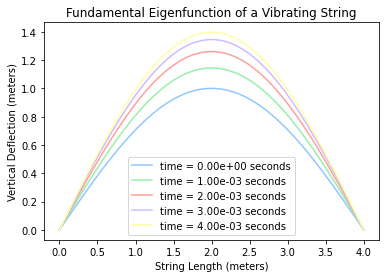

In [55]:
# eigenfunction
def u_n(x, t, n, params):
    c, B_n, Bstar_n, L = params
    lambda_n = c * n * np.pi / L
    return (B_n * np.cos(lambda_n * t) + Bstar_n * np.sin(lambda_n * t)) * np.sin(n * np.pi * x / L)

# choosing arbitrary parameters for coefficients
params = [200, 1, 1, 4]

# visualizing the plot for the length of the string
plt.style.use("seaborn-pastel")

plt.title("Fundamental Eigenfunction of a Vibrating String")
plt.xlabel("String Length (meters)")
plt.ylabel("Vertical Deflection (meters)")

# plotting at various times
for j in np.linspace(0, 0.004, 5):
    plt.plot([i for i in np.linspace(0, 4, 100)], [u_n(i, j, 1, params) for i in np.linspace(0, 4, 100)], label=f"time = {j:.2e} seconds")
    
plt.legend()
plt.show()

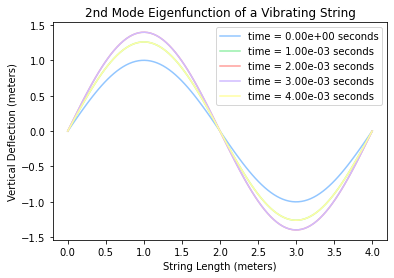

In [54]:
plt.title("2nd Mode Eigenfunction of a Vibrating String")
plt.xlabel("String Length (meters)")
plt.ylabel("Vertical Deflection (meters)")

# plotting at various times
for j in np.linspace(0, 0.004, 5):
    plt.plot([i for i in np.linspace(0, 4, 100)], [u_n(i, j, 2, params) for i in np.linspace(0, 4, 100)], label=f"time = {j:.2e} seconds")
    
plt.legend()
plt.show()

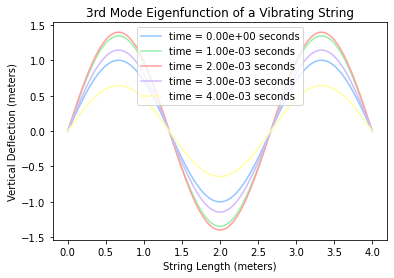

In [53]:
plt.title("3rd Mode Eigenfunction of a Vibrating String")
plt.xlabel("String Length (meters)")
plt.ylabel("Vertical Deflection (meters)")

# plotting at various times
for j in np.linspace(0, 0.004, 5):
    plt.plot([i for i in np.linspace(0, 4, 100)], [u_n(i, j, 3, params) for i in np.linspace(0, 4, 100)], label=f"time = {j:.2e} seconds")
    
plt.legend()
plt.show()

## Using Fourier Analysis to Find Solutions Satisfying Initial Conditions

* $B_n = \frac{2}{L} \int_{0}^{L}f(x)sin\left(\frac{n\pi x}{L}\right)dx$, where $f(x)$ is the initial position for each point on the string.
* $B_n^* = \frac{2}{cn \pi} \int_{0}^{L}g(x)sin\left(\frac{n\pi x}{L}\right)dx$, where $g(x)$ is the initial velocity profile.

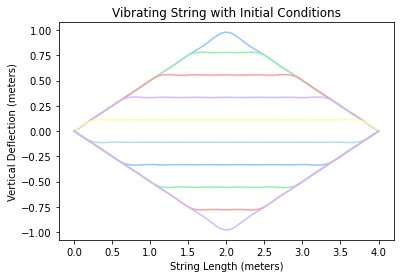

In [65]:
# initial position function (triangular)
def f(x, q, L):
    if x < 2:
        return (2*q/L) * x
    else:
        return (-2*q/L) * x + 2 * q

# initial velocity profile
def g(x):
    return 0

# eigenfunction
def u_n(x, t, n, c, L):
    Bstar_n = 2 / (c * n * np.pi) * integrate.quad(lambda x: g(x) * np.sin(n * np.pi / L), 0, L)[0]
    B_n = 2 / L  * integrate.quad(lambda x: f(x, 1, L) * np.sin(n * np.pi * x / L), 0, L)[0]
    lambda_n = c * n * np.pi / L
    return (B_n * np.cos(lambda_n * t) + Bstar_n * np.sin(lambda_n * t)) * np.sin(n * np.pi * x / L)

# solution function
def u(x, t, n, c, L):
    ans = 0 
    for i in range(1, n + 1):
        ans += u_n(x, t, i, c, L)
    return ans

# visualizing the plot for the length of the string
plt.style.use("seaborn-pastel")

plt.title("Vibrating String with Initial Conditions")
plt.xlabel("String Length (meters)")
plt.ylabel("Vertical Deflection (meters)")

# plotting at various times
c = 200
L = 4
n = 20
for j in np.linspace(0, 0.02, 10):
    plt.plot([i for i in np.linspace(0, 4, 100)], [u(i, j, n, c, L) for i in np.linspace(0, 4, 100)], label=f"time = {j:.2e} seconds")
    
# plt.legend()
plt.show()